# Fixed Income Derivatives - CIR Model Example

In the CIR model, the short rate $r_t$ is assumed to have the following dynamics under the risk-neutral measure $\mathbb{Q}$:
$$
dr_t = a(b-r_t)dt + \sigma\sqrt{r_t}dW_s
$$
where $a$, $b$ > 0, and $\sigma$ are parameters of the model, and $W_t$ is a Brownian motion under $\mathbb{Q}$.

In [1]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
import sys
import os
import numpy as np
from scipy.optimize import minimize

# add the directory where fixed_income_derivatives.py is located to the system path
sys.path.append(os.path.abspath("../../Files"))

# import own module
import fixed_income_derivatives_E2024 as fid
import plotting as plot

%load_ext autoreload
%autoreload 2

## Problem 1 - Solution and distribution of $r(t)$

#### (a) Find the closest equivalent to a solution for $r(t)$, $t > 0$, in the CIR model
I start by multiplying both sides by $e^{at}$
$$
e^{at}r_t dr_t= e^{at}r_t a(b-r_t)dt + e^{at}r_t \sigma\sqrt{r_t}dW_t \Rightarrow
$$
I can now apply Ito Lemma to $e^{at}r_t$:
$$
d(e^{at}r_t) = e^{at}dr_t + r_t de^{at} + de^{at}dr_t = e^{at}dr_t + ae^{at}r_tdt
$$
where I use that $de^{at} = ae^{at}dt$ and that $de^{at}dr_t = 0$. Substituting the expression for $dr_t$ into the equation above gives:
$$
\begin{split}
d(e^{at}r_t) &= e^{at}dr_t + ae^{at}r_tdt \\
&= e^{at}a(b-r_t)dt + e^{at} \sigma\sqrt{r_t}dW_t + ae^{at}r_tdt \\
&= abe^{at}dt + \sigma e^{at} \sqrt{r_t}dW_t
\end{split}
$$
Integrating both sides from $t$ to $T$ gives:

$$
\begin{split}
\int_t^T d(e^{au}{r_u}) &= ab\int_t^T e^{au}du + \sigma\int_t^T e^{au} \sqrt{r_u}dW_u \Rightarrow \\
e^{aT}r_T - e^{at}r_t &= ab\int_t^T e^{au}du + \sigma\int_t^T e^{au} \sqrt{r_u}dW_u \Rightarrow \\
r_T &= r_t e^{-a(T-t)} + ab\int_t^T e^{-a(T-u)}du + \sigma\int_t^T e^{-a(T-u)} \sqrt{r_u}dW_u
\end{split}
$$

Which is the closest equivalent to a solution for $r(t)$, $t > 0$, in the CIR model.

#### (b) Find the mean, $\mathbb{E}[r(t,T)]$, and the variance, $Var[r(t,T)]$, of $r(t,T)$. There is a ’trick’ involved when computing the variance, what is that trick called.

I start by deriving the mean of $r(t,T)$:
$$
\mathbb{E}[r(t,T)] = r(t)e^{-a(T-t)} + b\left[e^{-a(T-t)}\right]
$$
Where I have used that $r(t)$ is a martingale under the risk-neutral measure $\mathbb{Q}$ hence the stochastic integral has an expectation of zero.

<!-- Next, I derive the variance of $r(t,T)$:

$$
\begin{split}
Var[r(t,T)]  &= \mathbb{E}[r(t,T)^2] - \mathbb{E}[r(t,T)]^2
\end{split}
$$

Now I first compute the second moment $ \mathbb{E}[r^2(t,T)] $.

$$
\begin{aligned}
\mathbb{E}[r^2(t,T)] &= \mathbb{E}\left[ \left( e^{-a(T - t)} r(t) + b(1 - e^{-a(T - t)}) + \sigma e^{-a(T - t)} \int_t^T e^{a s} \sqrt{r(s)} \, dW_s \right)^2 \Bigg| r(t) \right] \\
&= e^{-2a(T - t)} r(t)^2 + 2 e^{-a(T - t)} r(t) b (1 - e^{-a(T - t)}) \\
&\quad + b^2 (1 - e^{-a(T - t)})^2 + \sigma^2 e^{-2a(T - t)} \mathbb{E}\left[ \left( \int_t^T e^{a s} \sqrt{r(s)} \, dW_s \right)^2 \Bigg| r(t) \right]
\end{aligned}
$$

Ito's Isometry allows us to compute the expectation of the square of a stochastic integral:

$$
\mathbb{E}\left[ \left( \int_t^T f(s) \, dW_s \right)^2 \Bigg| r(t) \right] = \int_t^T f(s)^2 \, ds
$$

In our case, $ f(s) = e^{a s} \sqrt{r(s)} $. Therefore:

$$
\mathbb{E}\left[ \left( \int_t^T e^{a s} \sqrt{r(s)} \, dW_s \right)^2 \Bigg| r(t) \right] = \int_t^T e^{2a s} \mathbb{E}[r(t,s)] \, ds
$$

Using the expression for the mean I can subtitude the above expression:

$$
\begin{aligned}
\mathbb{E}\left[ \left( \int_t^T e^{a s} \sqrt{r(s)} \, dW_s \right)^2 \Bigg| r(t) \right] &= \int_t^T e^{2a s} \left( r(t) e^{-a(s - t)} + b \left(1 - e^{-a(s - t)}\right) \right) ds \\
&= r(t) e^{a t} (T - t) + \frac{b}{2a} \left( e^{a(T + t)} - 2e^{2a t} + e^{2a t - a(T - t)} \right)
\end{aligned}
$$

Substituting this and the mean into the formula for the variance $\text{Var}[r(t,T)] = \mathbb{E}[r^2(t,T)] - \left( \mathbb{E}[r(t,T)] \right)^2$ gives:

$$
\begin{aligned}
\text{Var}[r(t,T)] &= \left( e^{-2a(T - t)} r(t)^2 + 2 e^{-a(T - t)} r(t) b (1 - e^{-a(T - t)}) + b^2 (1 - e^{-a(T - t)})^2 \right) \\
&\quad + \sigma^2 e^{-2a(T - t)} \int_t^T e^{2a s} \mathbb{E}[r(t,s)] \, ds - \left(r(t)e^{-a(T-t)} + b\left[e^{-a(T-t)}\right]\right)^2 \\
&= \sigma^2 e^{-2a(T - t)} \int_t^T e^{2a s} \mathbb{E}[r(t,s)] \, ds \\
&= \sigma^2 e^{-2a(T - t)} \left[ r(t) e^{a t} (T - t) + \frac{b}{2a} \left( e^{a(T + t)} - 2e^{2a t} + e^{2a t - a(T - t)} \right) \right] \\
&= \frac{\sigma^2 r(t)}{2a} \left(1 - e^{-a(T - t)}\right) e^{-a(T - t)} + \frac{b \sigma^2}{2a} \left(1 - e^{-a(T - t)}\right)^2
\end{aligned}
$$

Hence I arrive at the following expression for the variance of $r(t,T)$: -->

Using Ito Isometry, I can compute the variance of the stochastic integral and arrive at the following expression for the variance of $r(t,T)$:
$$
\text{Var}[r(t,T)] = \frac{\sigma^2 r(t)}{a} \left(e^{-a(T - t)}  - e^{-2a(T - t)}\right)+ \frac{\sigma^2 b}{2a} \left(1 - e^{-a(T - t)}\right)^2
$$

#### (c) State the distribution of r(t) but do not try to derive it.
The distribution of $r(t)$, $t_T\mid\mathcal{F}_t$, is a non-central chi-squared distribution:
$$
\frac{\sigma^2}{4b}\left[1-e^{-b(T-t)}\right]Y
$$
where $Y$ is a non-central chi-squared random variable with $k$ degrees of freedom and non-centrality parameter $\lambda$.
$$
k = \frac{4ab}{\sigma^2}, \quad \lambda = \frac{4ae^{-a(T-t)}}{\sigma^2[1-e^{-a(T-t)}]}r(t)
$$

#### (d) State the distribution of $r(t)$ as $t \to \infty$ but do not try to derive it. That is, find the stationary distribution of $r(\infty)$.
The stationary distribution of $r(\infty)$ is a gamma distribution:
$$
r_\infty \sim Gamma(\alpha, \beta), \quad \alpha = \frac{2ab}{\sigma^2}, \quad \beta = \frac{\sigma^2}{2a}, \quad f_{r_\infty}(x) = \frac{1}{\Gamma(\alpha)\beta^\alpha}x^{\alpha-1}e^{-x/\beta}
$$

## Problem 2 - Fitting the CIR model to the Yield Curve
Now assume that the parameters of the CIR model are $r0 = 0.032$, $a = 1.2$, $b = 0.048$ and $\sigma = 0.1$ Compute ZCB prices, continuously compounded spot rates and instantaneous forward rates in the CIR model.

In [2]:
r0, a, b, sigma = 0.032, 1.2, 0.048, 0.1
T_max = 10 # years
alpha = 0.5 # timing between payments
M = int(T_max/alpha) + 1 # number of payments (periods +1 as range is exclusive)
T = np.array([i*alpha for i in range(0,M)])

#### (a) Plot these ZCB prices, spot rates and instantaneous forward rates for values of $t$ in $[0,10]$

In [3]:
p = fid.zcb_price_cir(r0, a, b, sigma, T)
R = fid.spot_rate_cir(r0, a, b, sigma, T)
f = fid.forward_rate_cir(r0, a, b, sigma, T)

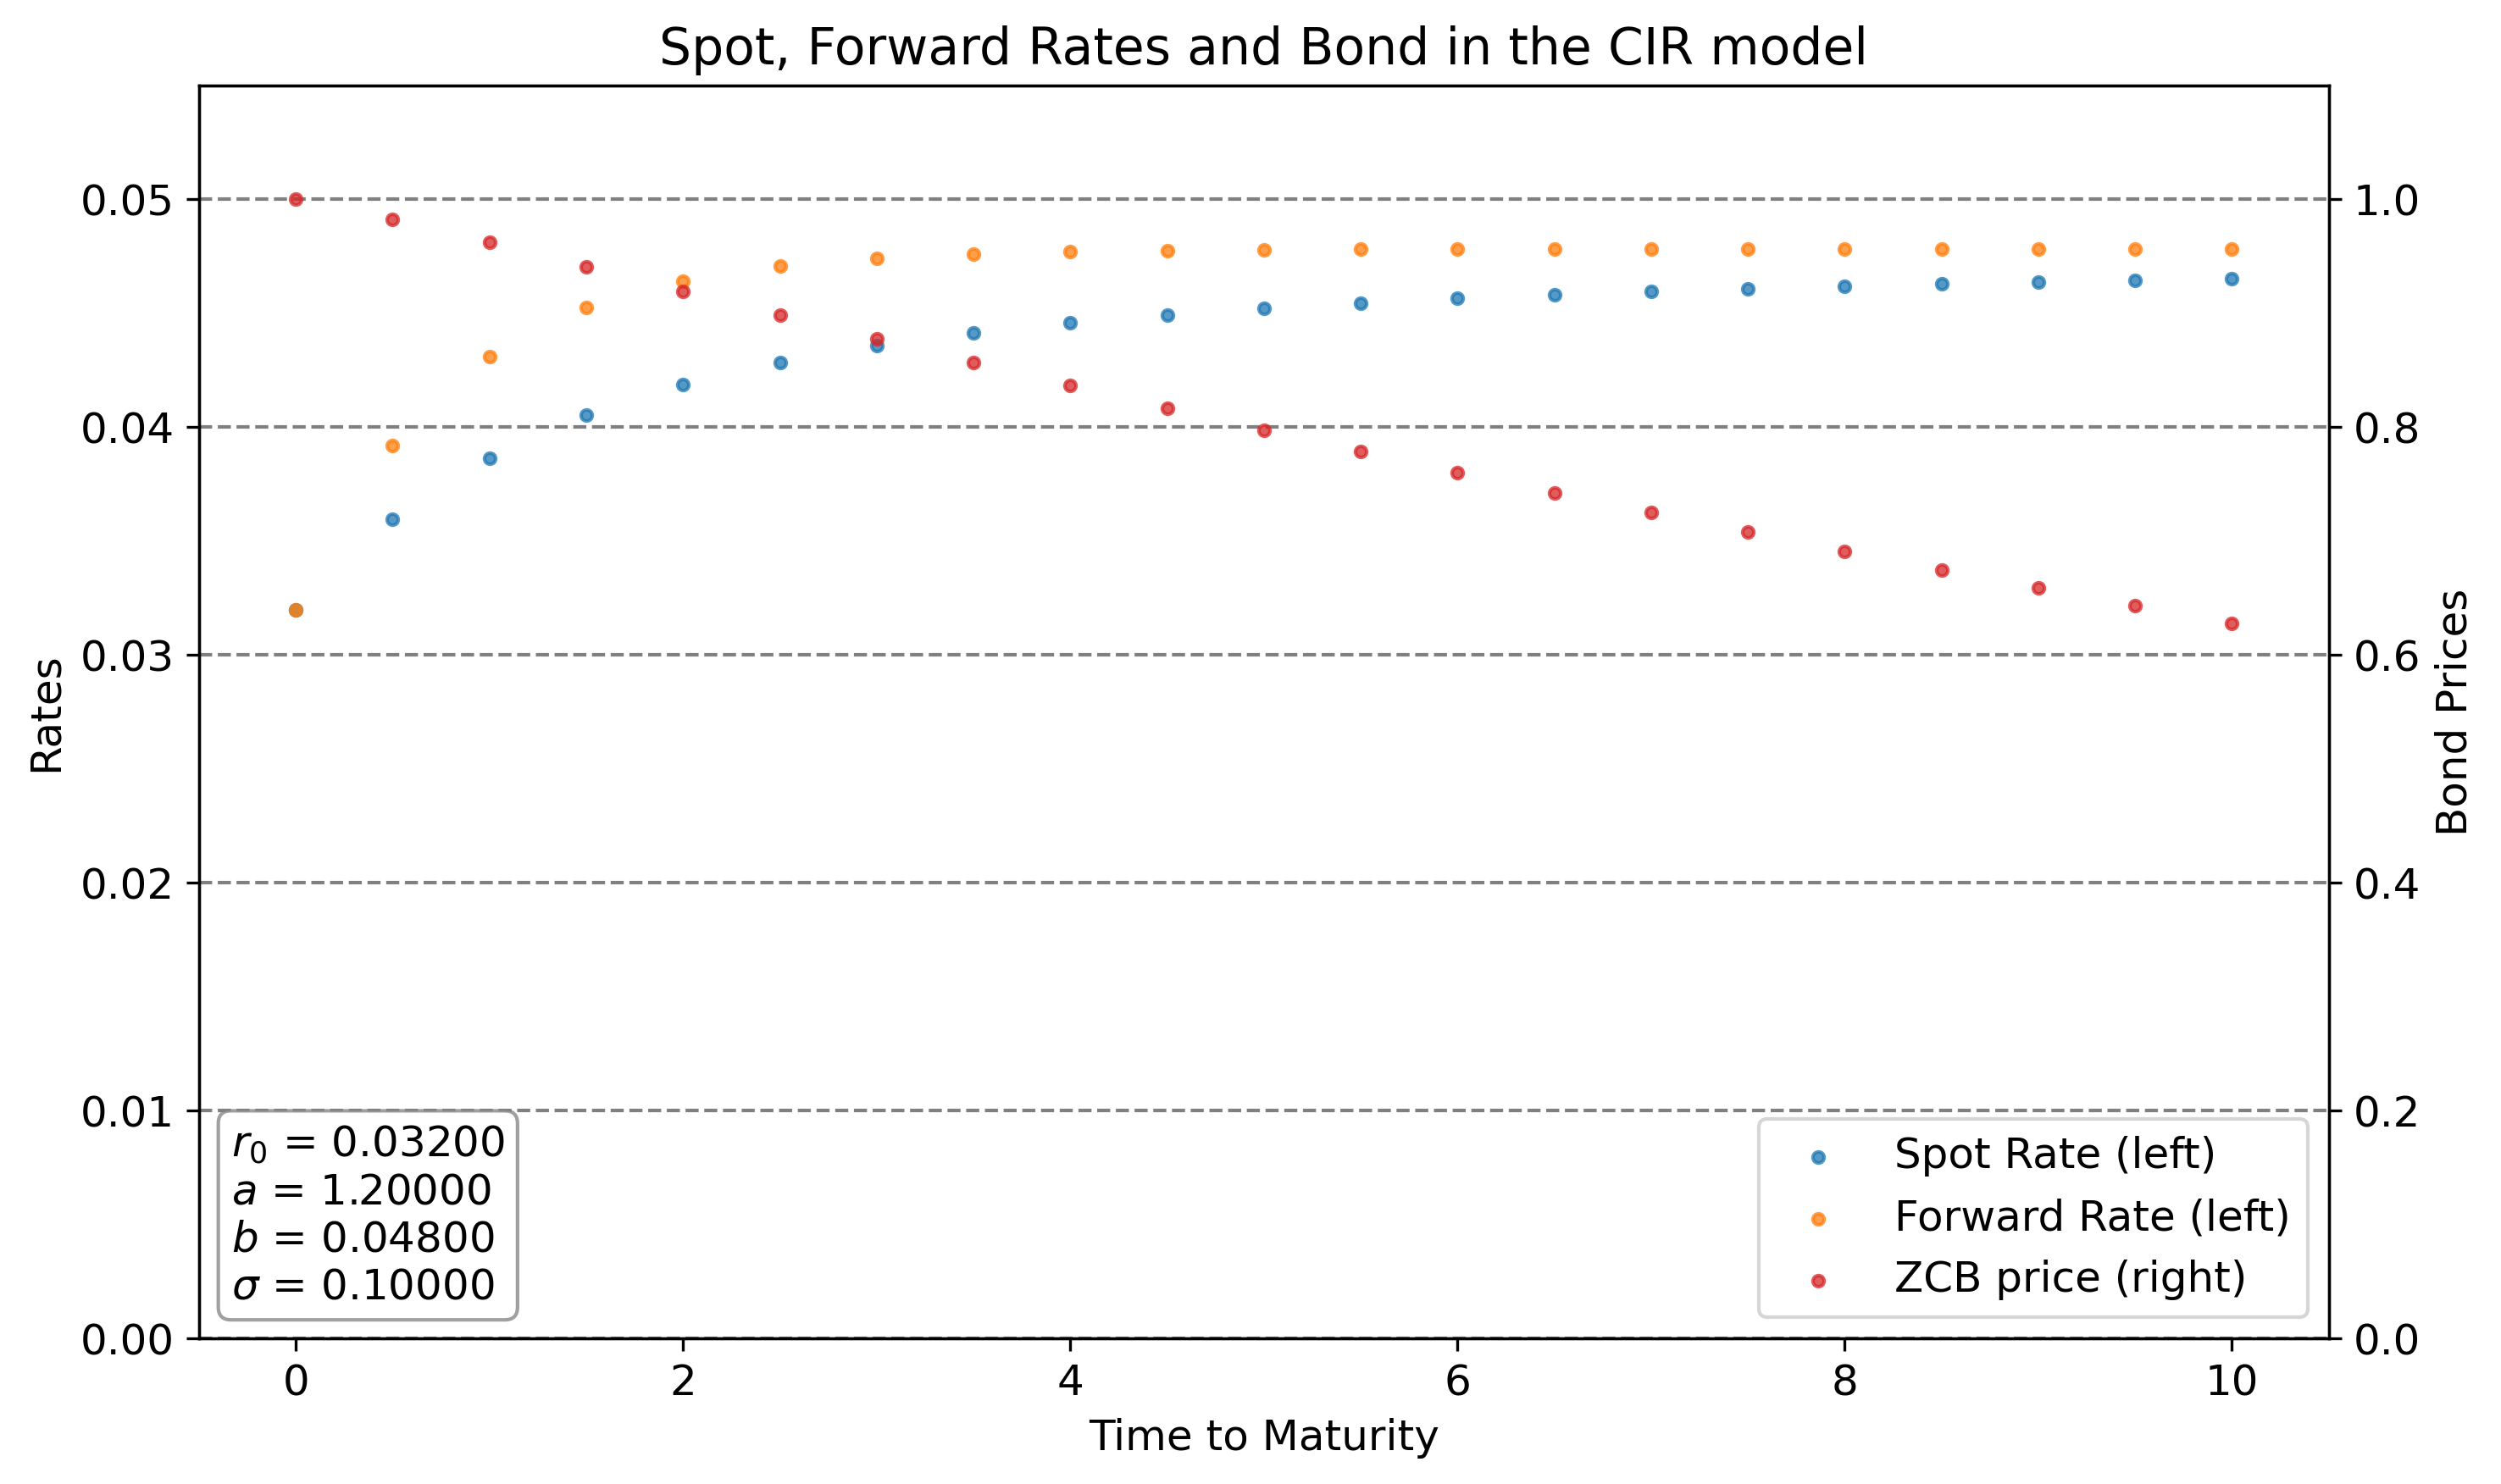

In [4]:
left_axis = [{'label':'Spot Rate','x':T,'y':R,'s':40},
                {'label':'Forward Rate','x':T,'y':f,'s':40}]
right_axis = [{'label':'ZCB price','x':T,'y':p,'s':40}]
text = {'$r_0$':r0,'$a$':a,'$b$':b,'$\sigma$':sigma}

plot.rates(left_axis, right_axis,'Spot, Forward Rates and Bond in the CIR model', text)

#### (b)Now compute spot rates for maturities $T \in \{0.5,1,1.5,...,10\}$ using the parameters given above and fit all the parameters in a CIR model to these spot rates. Are you able to recover the parameters of the CIR model as you should be? Are there any difficulties with any of the parameters?

In [5]:
param_0 = 0.03, 0.5, 0.04, 0.08 # initial guess for the parameters (not the real ones)
result = minimize(fid.fit_cir_obj,param_0, method='nelder-mead', args=(R, T), options={'xatol':1e-7, 'disp':False})
print(f'Parameter from the fit:\n{result.x}\nSSE of the fit:\n{result.fun}')

Parameter from the fit:
[0.03199967 1.1966947  0.04805028 0.11381587]
SSE of the fit:
7.13408384994831e-13


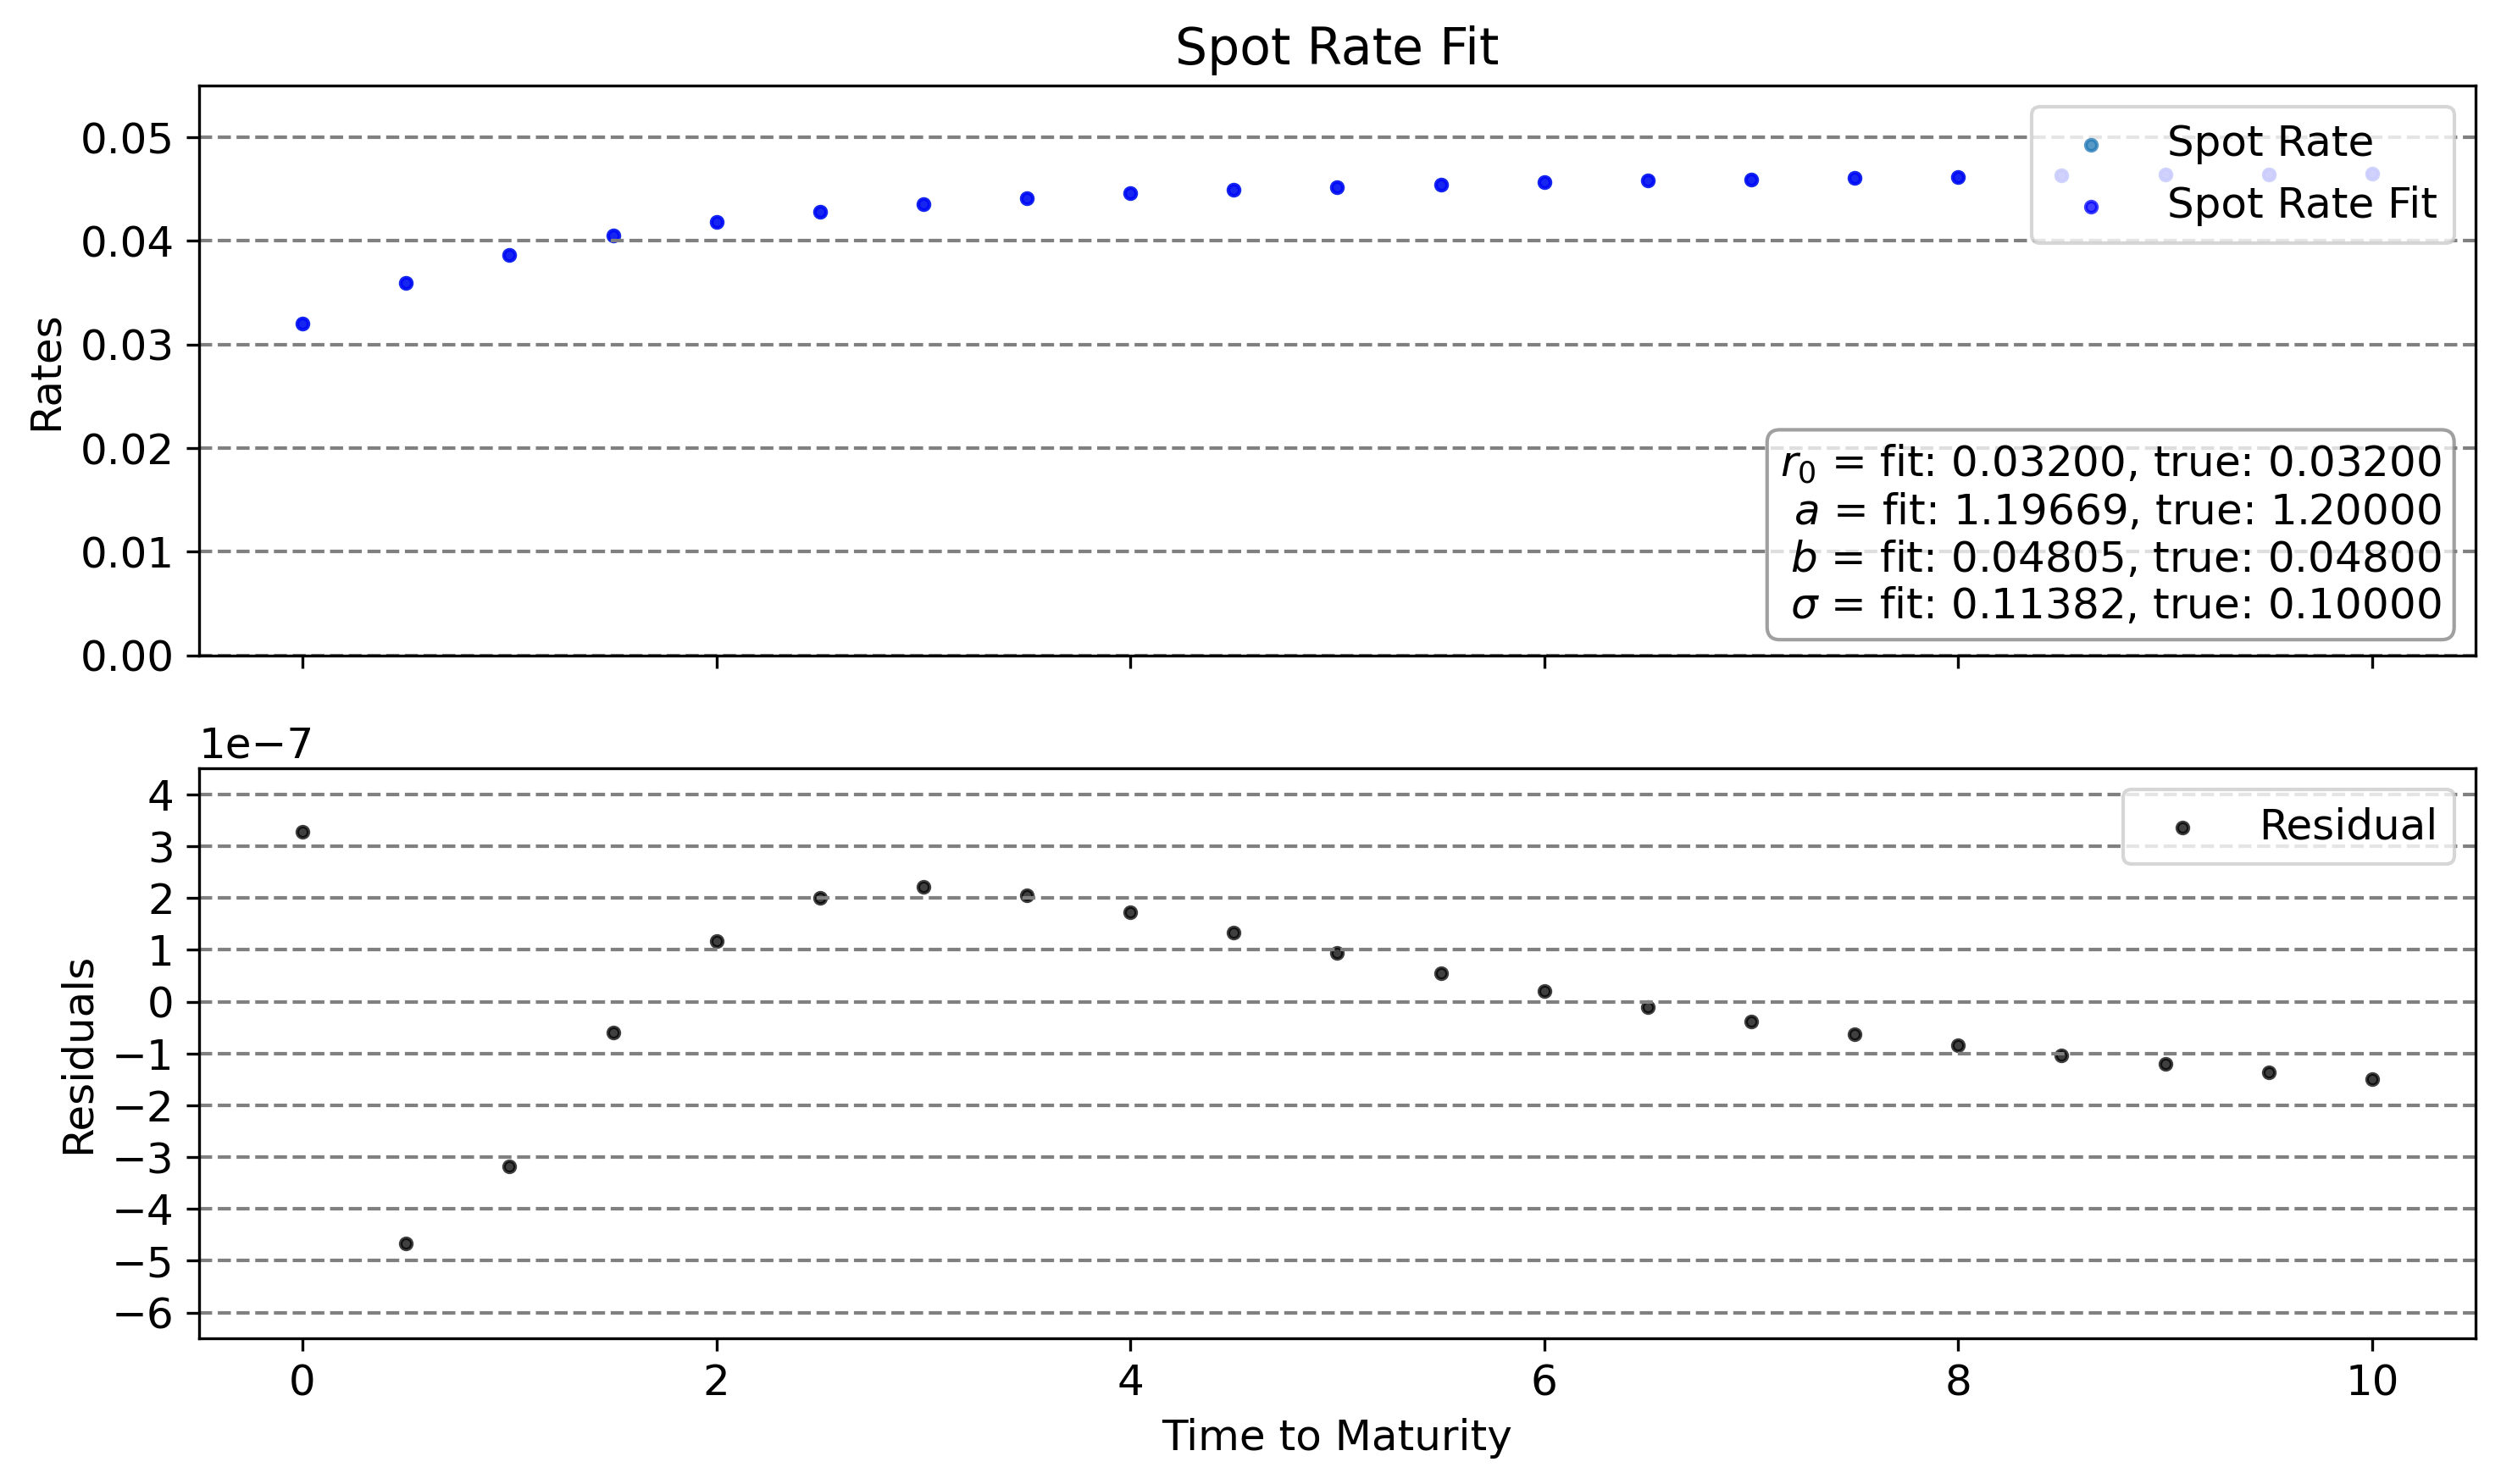

In [6]:
R_fit = fid.spot_rate_cir(result.x[0], result.x[1], result.x[2], result.x[3], T)
residual = R - R_fit
fit = [{'label':'Spot Rate','x':T,'y':R,'s':40},
                {'label':'Spot Rate Fit','x':T,'y':R_fit,'s':40, 'color':'blue'}]
res = [{'label':'Residual','x':T,'y':residual,'s':40}]
text = {'$r_0$':f'fit: {result.x[0]:.5f}, true: {r0:.5f}', 
        '$a$':f'fit: {result.x[1]:.5f}, true: {a:.5f}', 
        '$b$':f'fit: {result.x[2]:.5f}, true: {b:.5f}', 
        '$\sigma$':f'fit: {result.x[3]:.5f}, true: {sigma:.5f}'}
text_res = {'SSE':f'{result.fun:.5f}'}
plot.fit(fit,res, 'Spot Rate Fit', text)

As seen we are very close to being able to recover the model parameters, only the variance seem to be a bit to high.

#### (c) Now try to fit the parameters this time assuming that you known that $\sigma = 0.1$. Are you able to fit the model parameters and is the fit now better? Explain what this tells you about $\sigma$ in a CIR model.

In [7]:
param_0 = 0.03, 0.5, 0.04
result = minimize(fid.fit_cir_no_sigma_obj,param_0, method='nelder-mead', args=(sigma,R, T), options={'xatol':1e-7, 'disp':False})
print(f'Parameter from the fit:\n{result.x}\nSSE of the fit:\n{result.fun}')

Parameter from the fit:
[0.032      1.19999993 0.048     ]
SSE of the fit:
2.152995823905639e-19


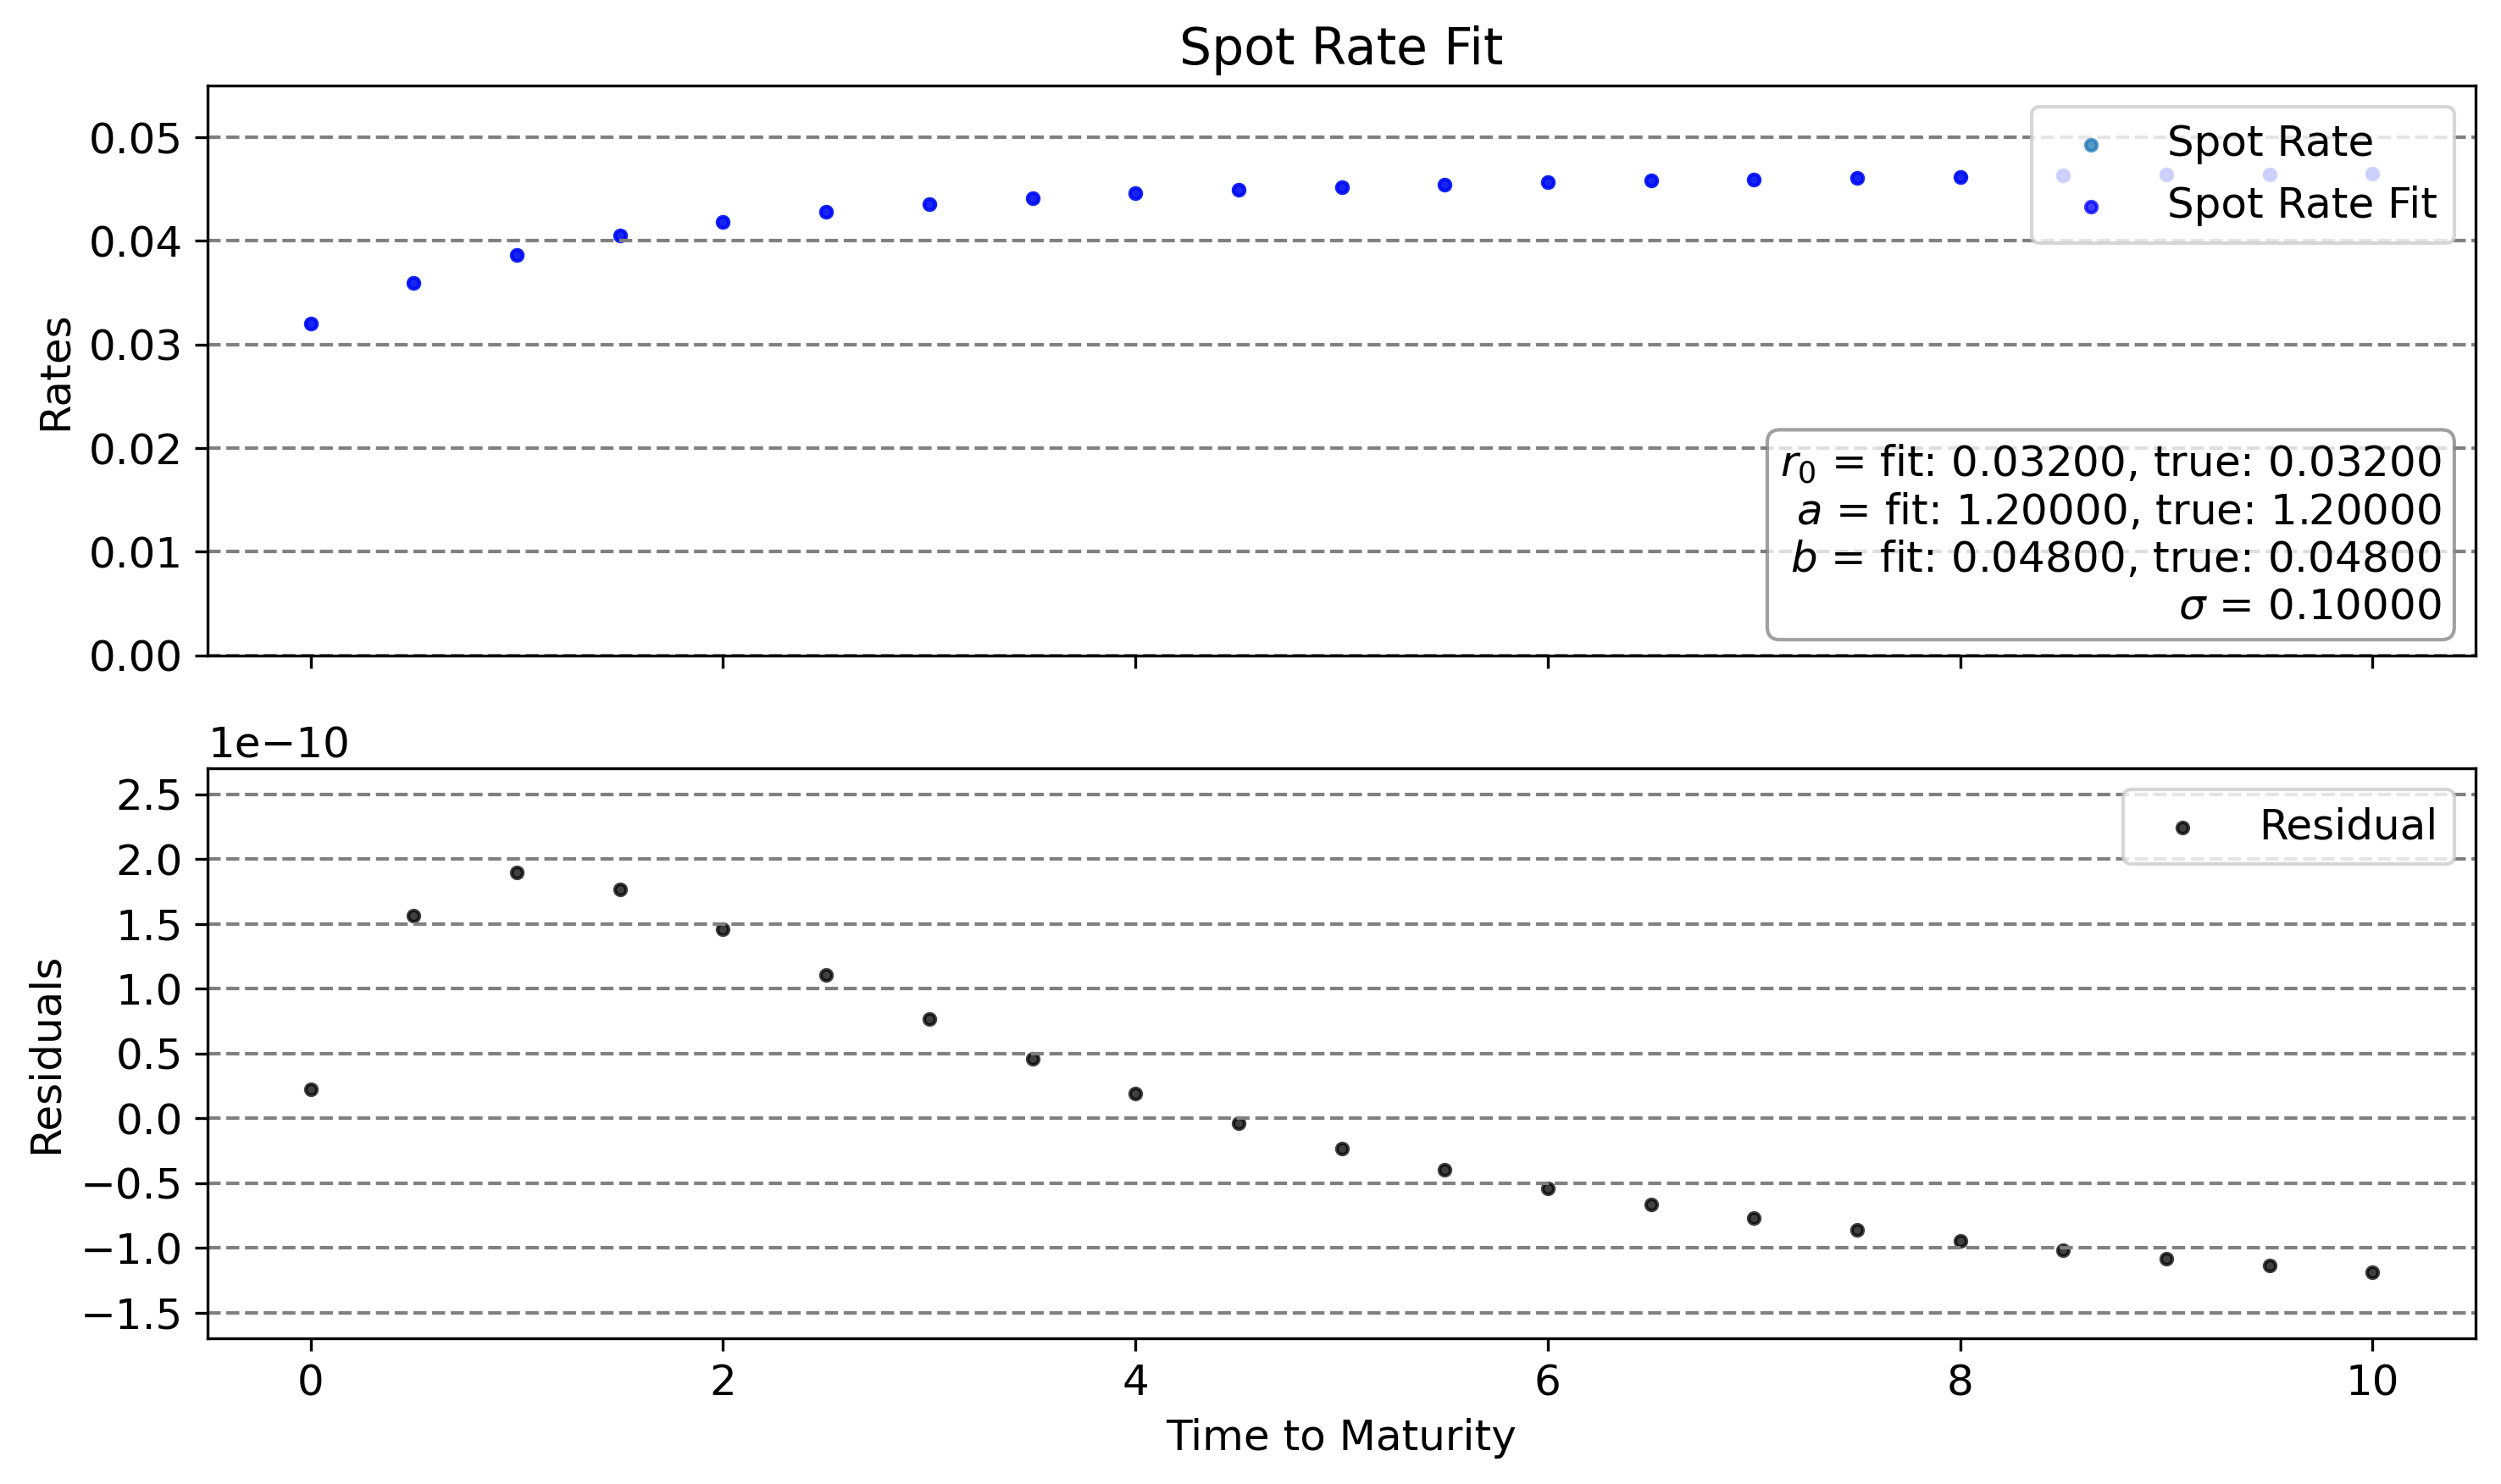

In [8]:
R_fit = fid.spot_rate_cir(result.x[0], result.x[1], result.x[2], sigma, T)
residual = R - R_fit
fit = [{'label':'Spot Rate','x':T,'y':R,'s':40},
                {'label':'Spot Rate Fit','x':T,'y':R_fit,'s':40, 'color':'blue'}]
res = [{'label':'Residual','x':T,'y':residual,'s':40}]
text = {'$r_0$':f'fit: {result.x[0]:.5f}, true: {r0:.5f}', 
        '$a$':f'fit: {result.x[1]:.5f}, true: {a:.5f}', 
        '$b$':f'fit: {result.x[2]:.5f}, true: {b:.5f}', 
        '$\sigma$':sigma}
text_res = {'SSE':f'{result.fun:.5f}'}
plot.fit(fit,res, 'Spot Rate Fit', text)

We see that now that we have a known variance we completly recover all variables and even the sligh discrepancies earlier are gone

## Problem 3 - The Interest Rate Swap
We will now study interest rate swaps that involve swapping 6M floating rate payments (EURIBOR say) paid semiannually for fixed payments also paid semi-annually. Assume that present time is $t = 0$ and that the 6M floating rate to be paid at time $T = 0.5$ has just been announced. For simplicity, you can assume the notional of these swaps is just $1$.

#### (a) Compute the par swap rate of 10Y interest rate swap.

In [9]:
idx_n, idx_N = 0, 20 # half year fixings for 10 years

# accural factor using the using the zcb prices
S_swap = np.sum(alpha*p[idx_n+1:idx_N+1])

# par swap rate
R_swap = (p[idx_n] - p[idx_N])/S_swap

print(f'Par swap rate:\n{R_swap}')

Par swap rate:
0.046800678748095556


#### (b) Compute par swap rates for maturities $T \in \{1,1.5,...,10\}$ and plot the par swap curve along side spot rates and 6M forward rates.

In [10]:
# function to calculate the par swap rate
def swap_fct(idx_n,idx_N,alpha,p):
    S_swap = np.sum(alpha*p[idx_n+1:idx_N+1])
    R_swap = (p[idx_n] - p[idx_N])/S_swap
    f_swap = -(np.log(p[idx_N])-np.log(p[idx_N-1]))/(T[idx_N]-T[idx_N-1])
    return R_swap, S_swap, f_swap

In [11]:
R_swap_plot, S_swap_plot, f_6M_plot = np.zeros(M), np.zeros(M), np.zeros(M)

idx_N_plot = np.array([i for i in range(1,M)])  
for idx_N in idx_N_plot:
    R_swap_plot[idx_N], S_swap_plot[idx_N], f_6M_plot[idx_N] = swap_fct(idx_n,idx_N,alpha,p) # keeping idx_n fixed at 0

# f_6M_plot = fid.forward_rates_from_zcb_prices(T,fid.zcb_prices_from_spot_rates(T, R_swap_plot))

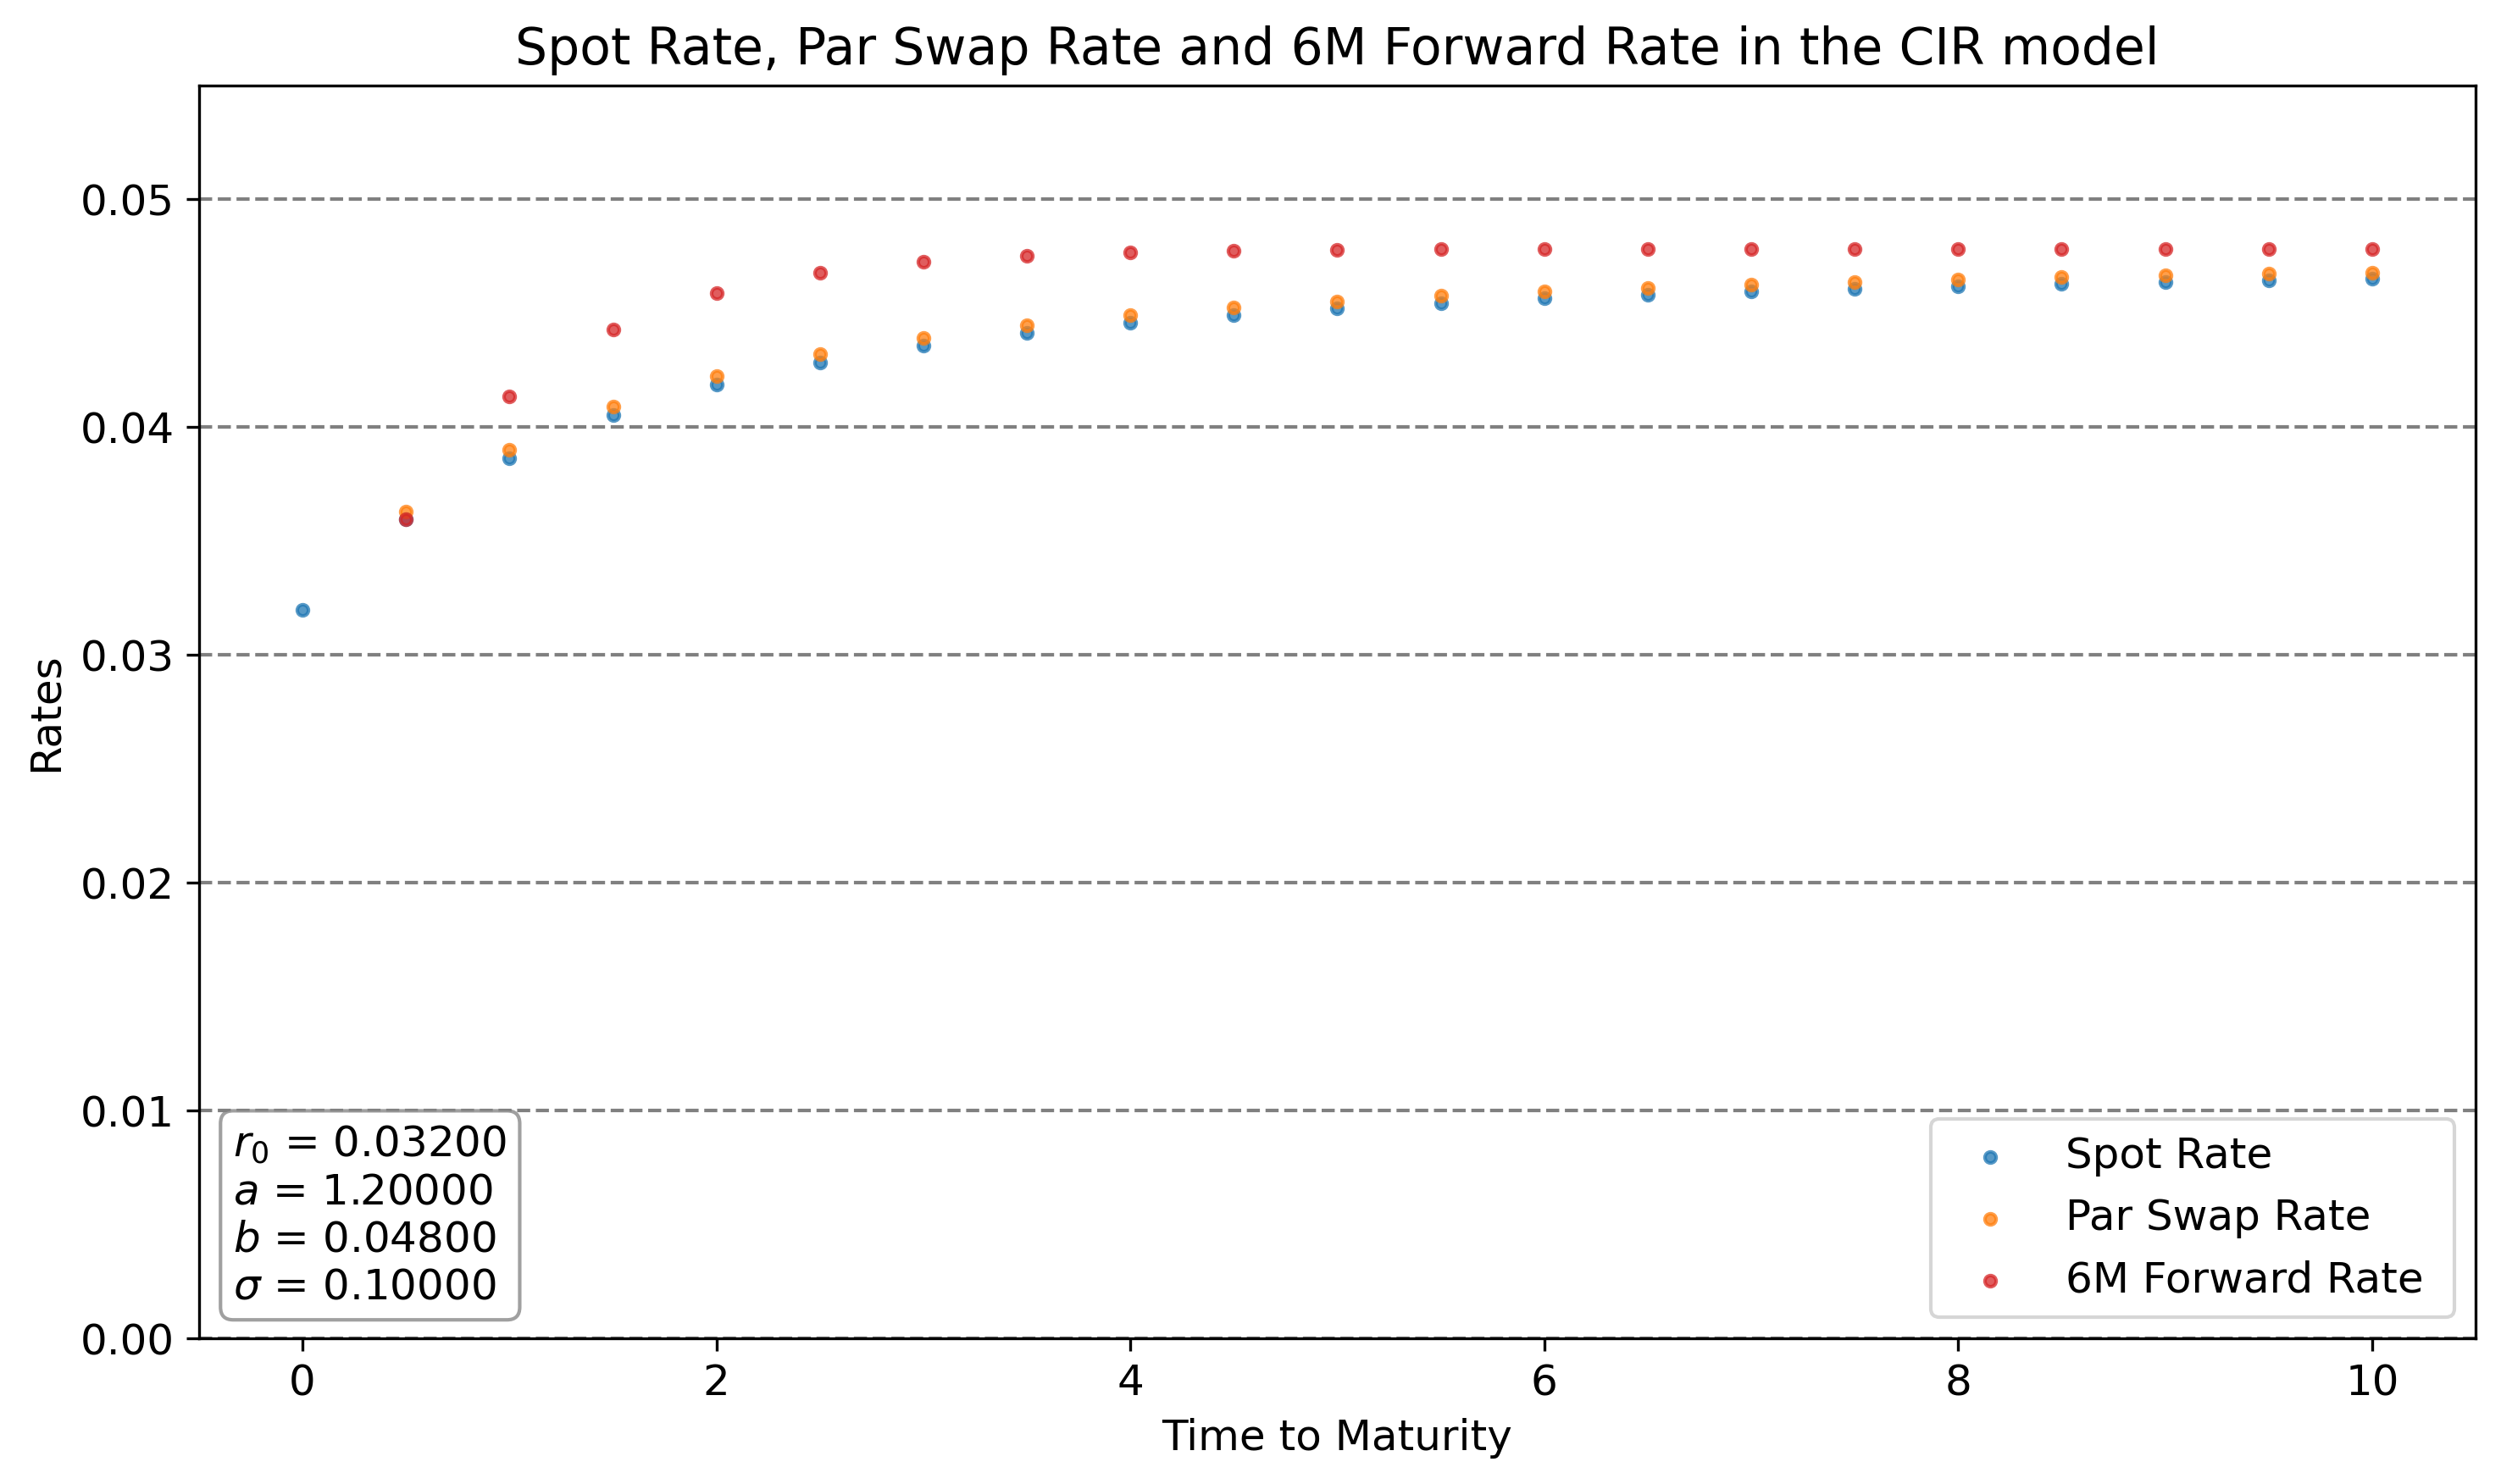

In [12]:
left_axis = [{'label':'Spot Rate','x':T,'y':R,'s':40},
             {'label':'Par Swap Rate','x':T[1:],'y':R_swap_plot[1:],'s':40},
             {'label':'6M Forward Rate','x':T[1:],'y':f_6M_plot[1:],'s':40}]
text = {'$r_0$':r0,'$a$':a,'$b$':b,'$\sigma$':sigma}
plot.rates(left_axis, title='Spot Rate, Par Swap Rate and 6M Forward Rate in the CIR model', text=text)

#### (c) Explain how 6M forward rates and par swap rates are related.
6M forward rates and par swap rates both derive from the term structure of interest rates, using zero-coupon bond prices. Forward rates indicate expected future rates, while par swap rates balance fixed and floating cash flows over a swap's life​​​​

#### (b) You will notice that par swap rates and zero coupon spot rates are very close. Explain why that is so by appealing to concepts such as the accrual factor of a swap and the duration of all bonds in general

Par swap rates and spot rates are close because par swaps are effectively weighted averages of zero-coupon rates over the swap's maturity. Both use the same discount factors, and the short accrual intervals of swaps ensure minimal deviation​​.

## Problem 4 - Simulating the short rate in the CIR model
Now we will simulate short rates in the CIR model using an appropriately chosen scheme on a grid of mesh $\delta$ that runs from initial time $t_0 = 0$ to terminal time $T = 10$. Denote by $M$, the number of steps in your simulation. The time points in your simulation will be numbered $m = 0,1,2,...,M −1,M$ and the time points will be $[t_0,t_1,...,t_{M−1},t_M] = [0,δ,2δ,...,T −δ,T]$ and $\delta = \frac{T}{M}$

#### (a) Explain which schemes are available when simulating the short rate in the CIR model. Also explain which of the schemes are expected to perform better

**Exact Method:**
- Uses the exact distribution of the CIR process, which is a non-central chi-squared distribution.
- It is the most accurate as it avoids discretization errors, capturing the true dynamics of the CIR model.

**Euler Method:**
- Applies the Euler-Maruyama scheme for discretizing stochastic differential equations.
- Simple but introduces discretization bias, especially for processes like CIR with square-root terms.

**Milstein Method:**
- An improvement over Euler by adding a correction term to reduce discretization errors.
- Better than Euler but still not as precise as the exact method.

**Performance Expectation:**
- Exact is the most accurate and should be preferred when computational resources allow.
- Milstein balances accuracy and computational efficiency, making it better than Euler for approximations.
- Euler is the simplest but less accurate, suitable for quick and less critical simulations.

#### (b) Simulate one trajectory of the short rate and plot the trajectory up to time T = 10

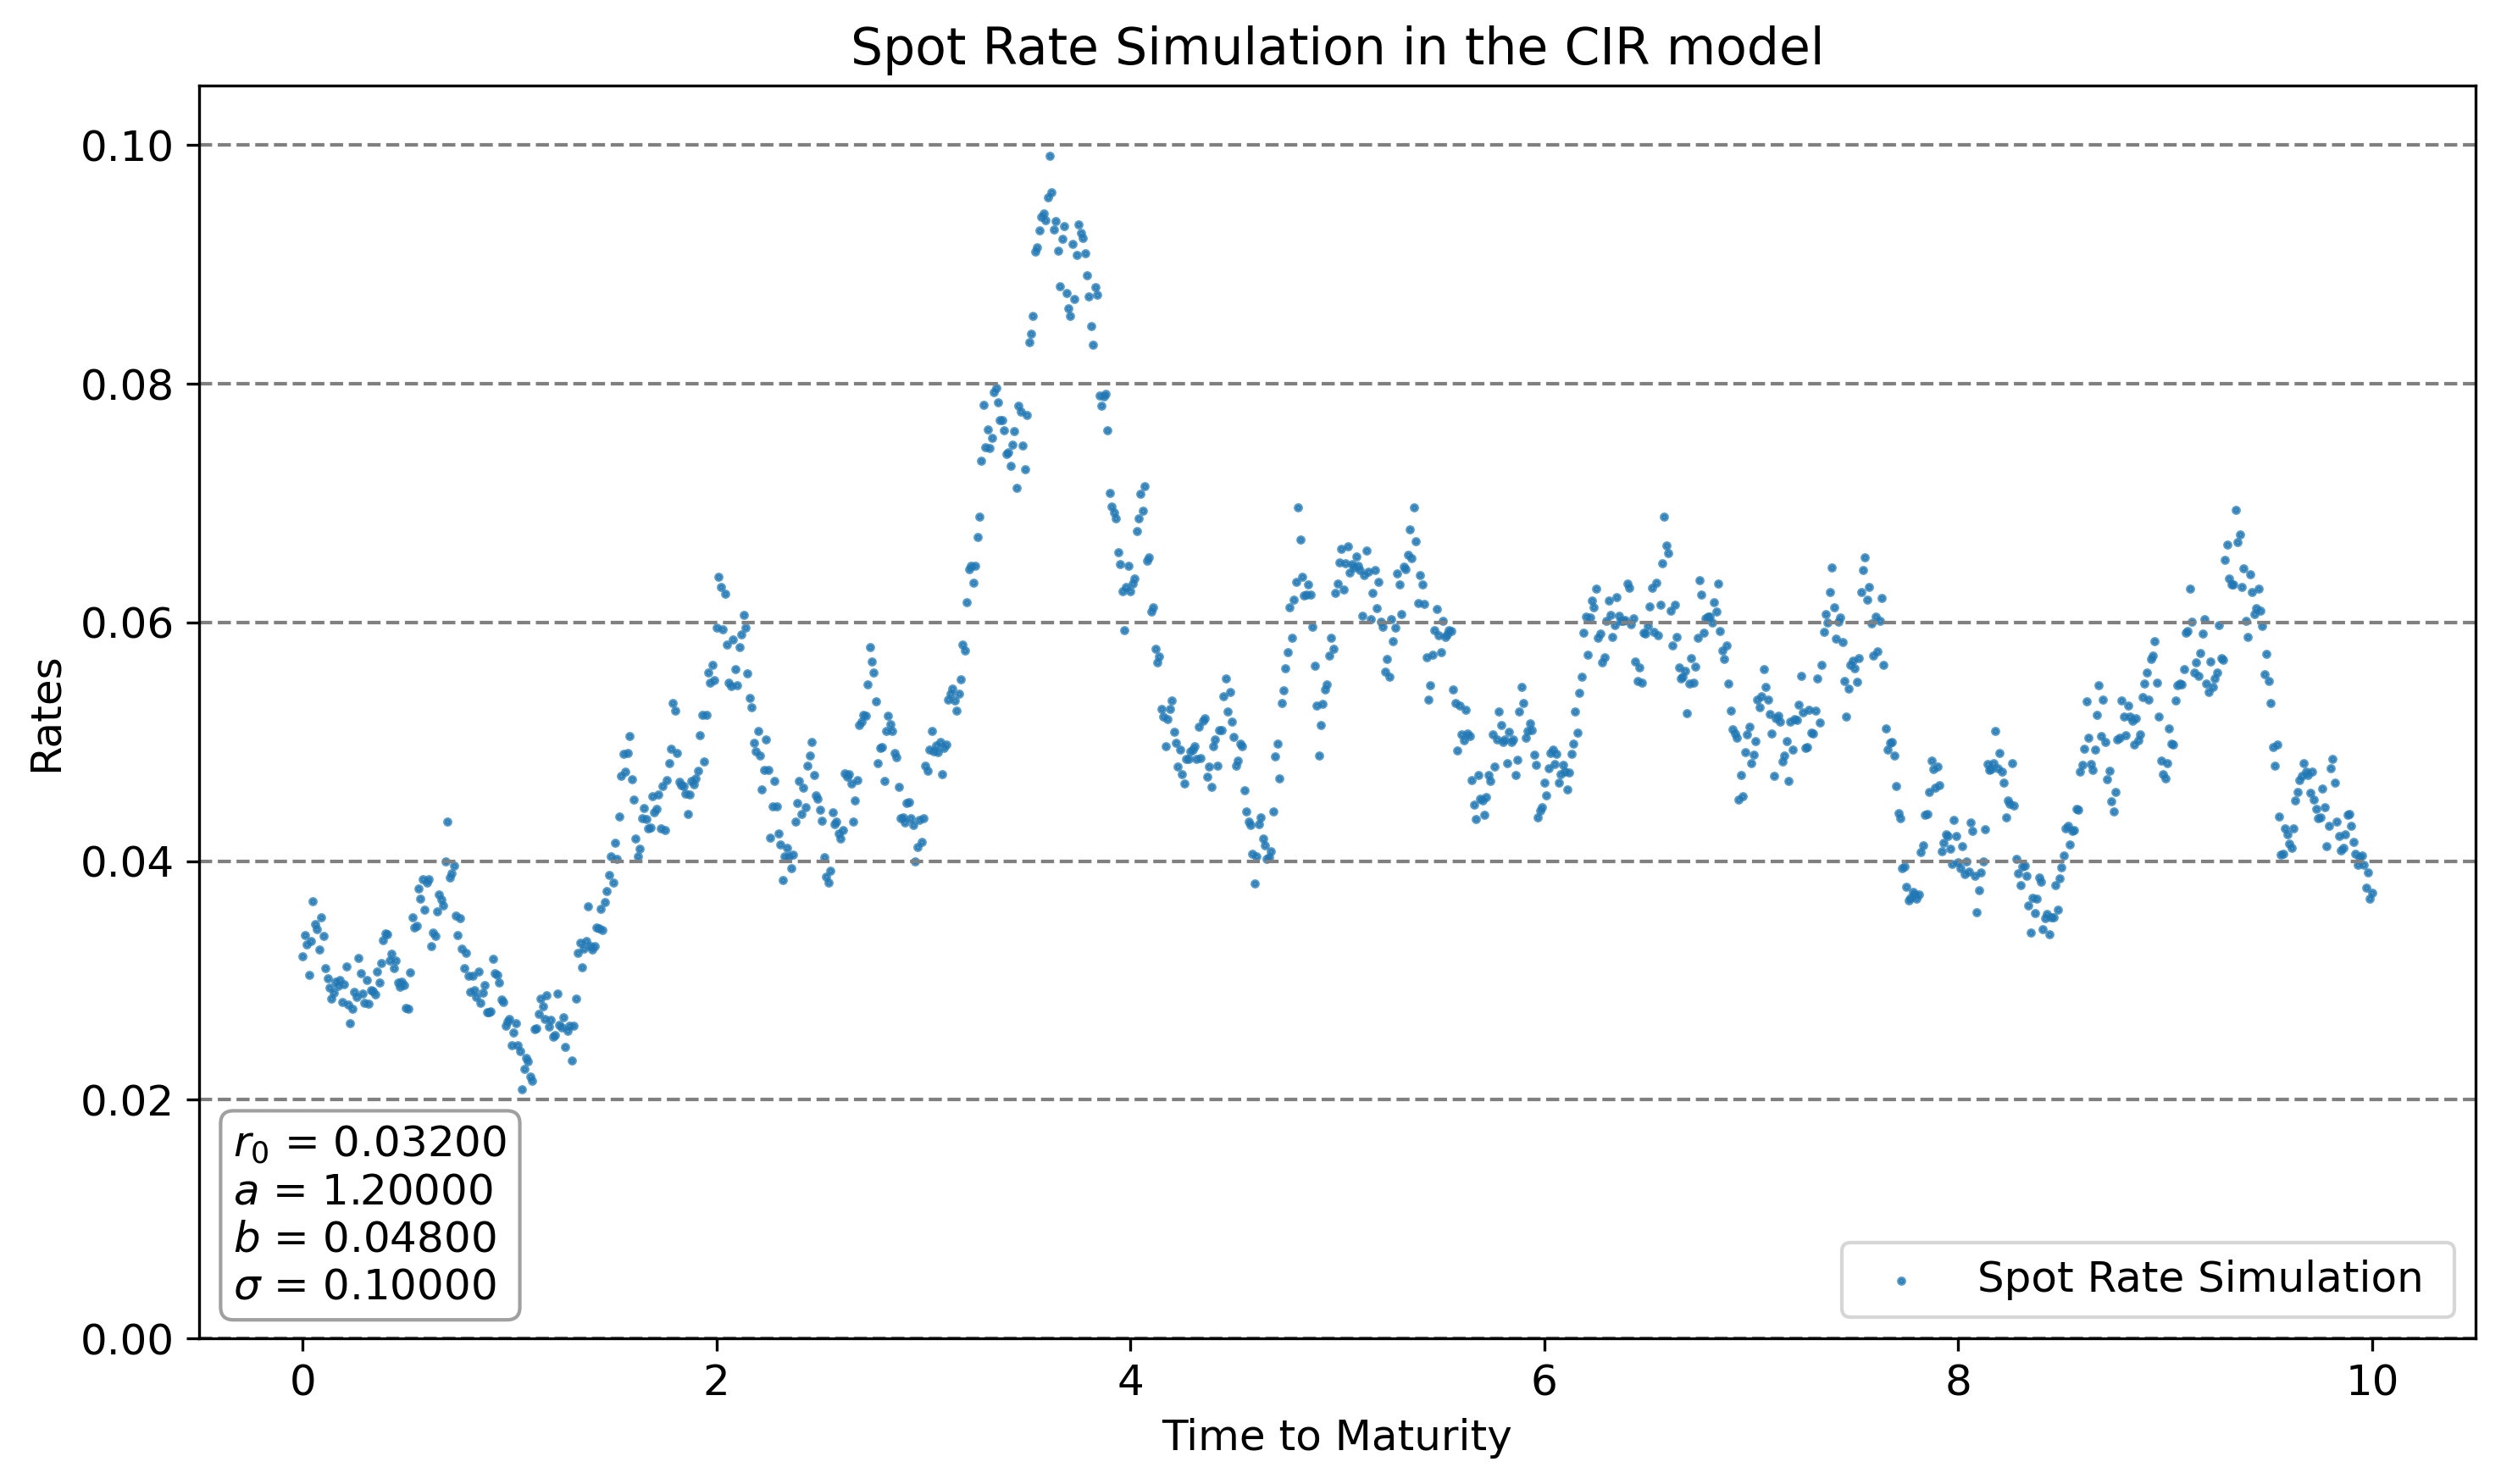

In [13]:
np.random.seed(2024)
M_simul, T_simul = 1000, 10 # M_simul = no simulations/points in simulation (NB the actual number is M_simul+1 as is also has the number from time 0), T_simul = years to simulate over
r_simul = fid.simul_cir(r0, a, b, sigma, M_simul, T_simul, method='exact')
t_simul = np.array([i*(T_simul/M_simul) for i in range(0,M_simul+1)]) # time points for the simulation

left_axis = [{'label':'Spot Rate Simulation','x':t_simul,'y':r_simul,'s':10}]
text = {'$r_0$':r0,'$a$':a,'$b$':b,'$\sigma$':sigma}
plot.rates(left_axis, title='Spot Rate Simulation in the CIR model', text=text)

#### (c) Construct 95 percent two-sided confidence intervals for the short rate and plot these in the same plot.

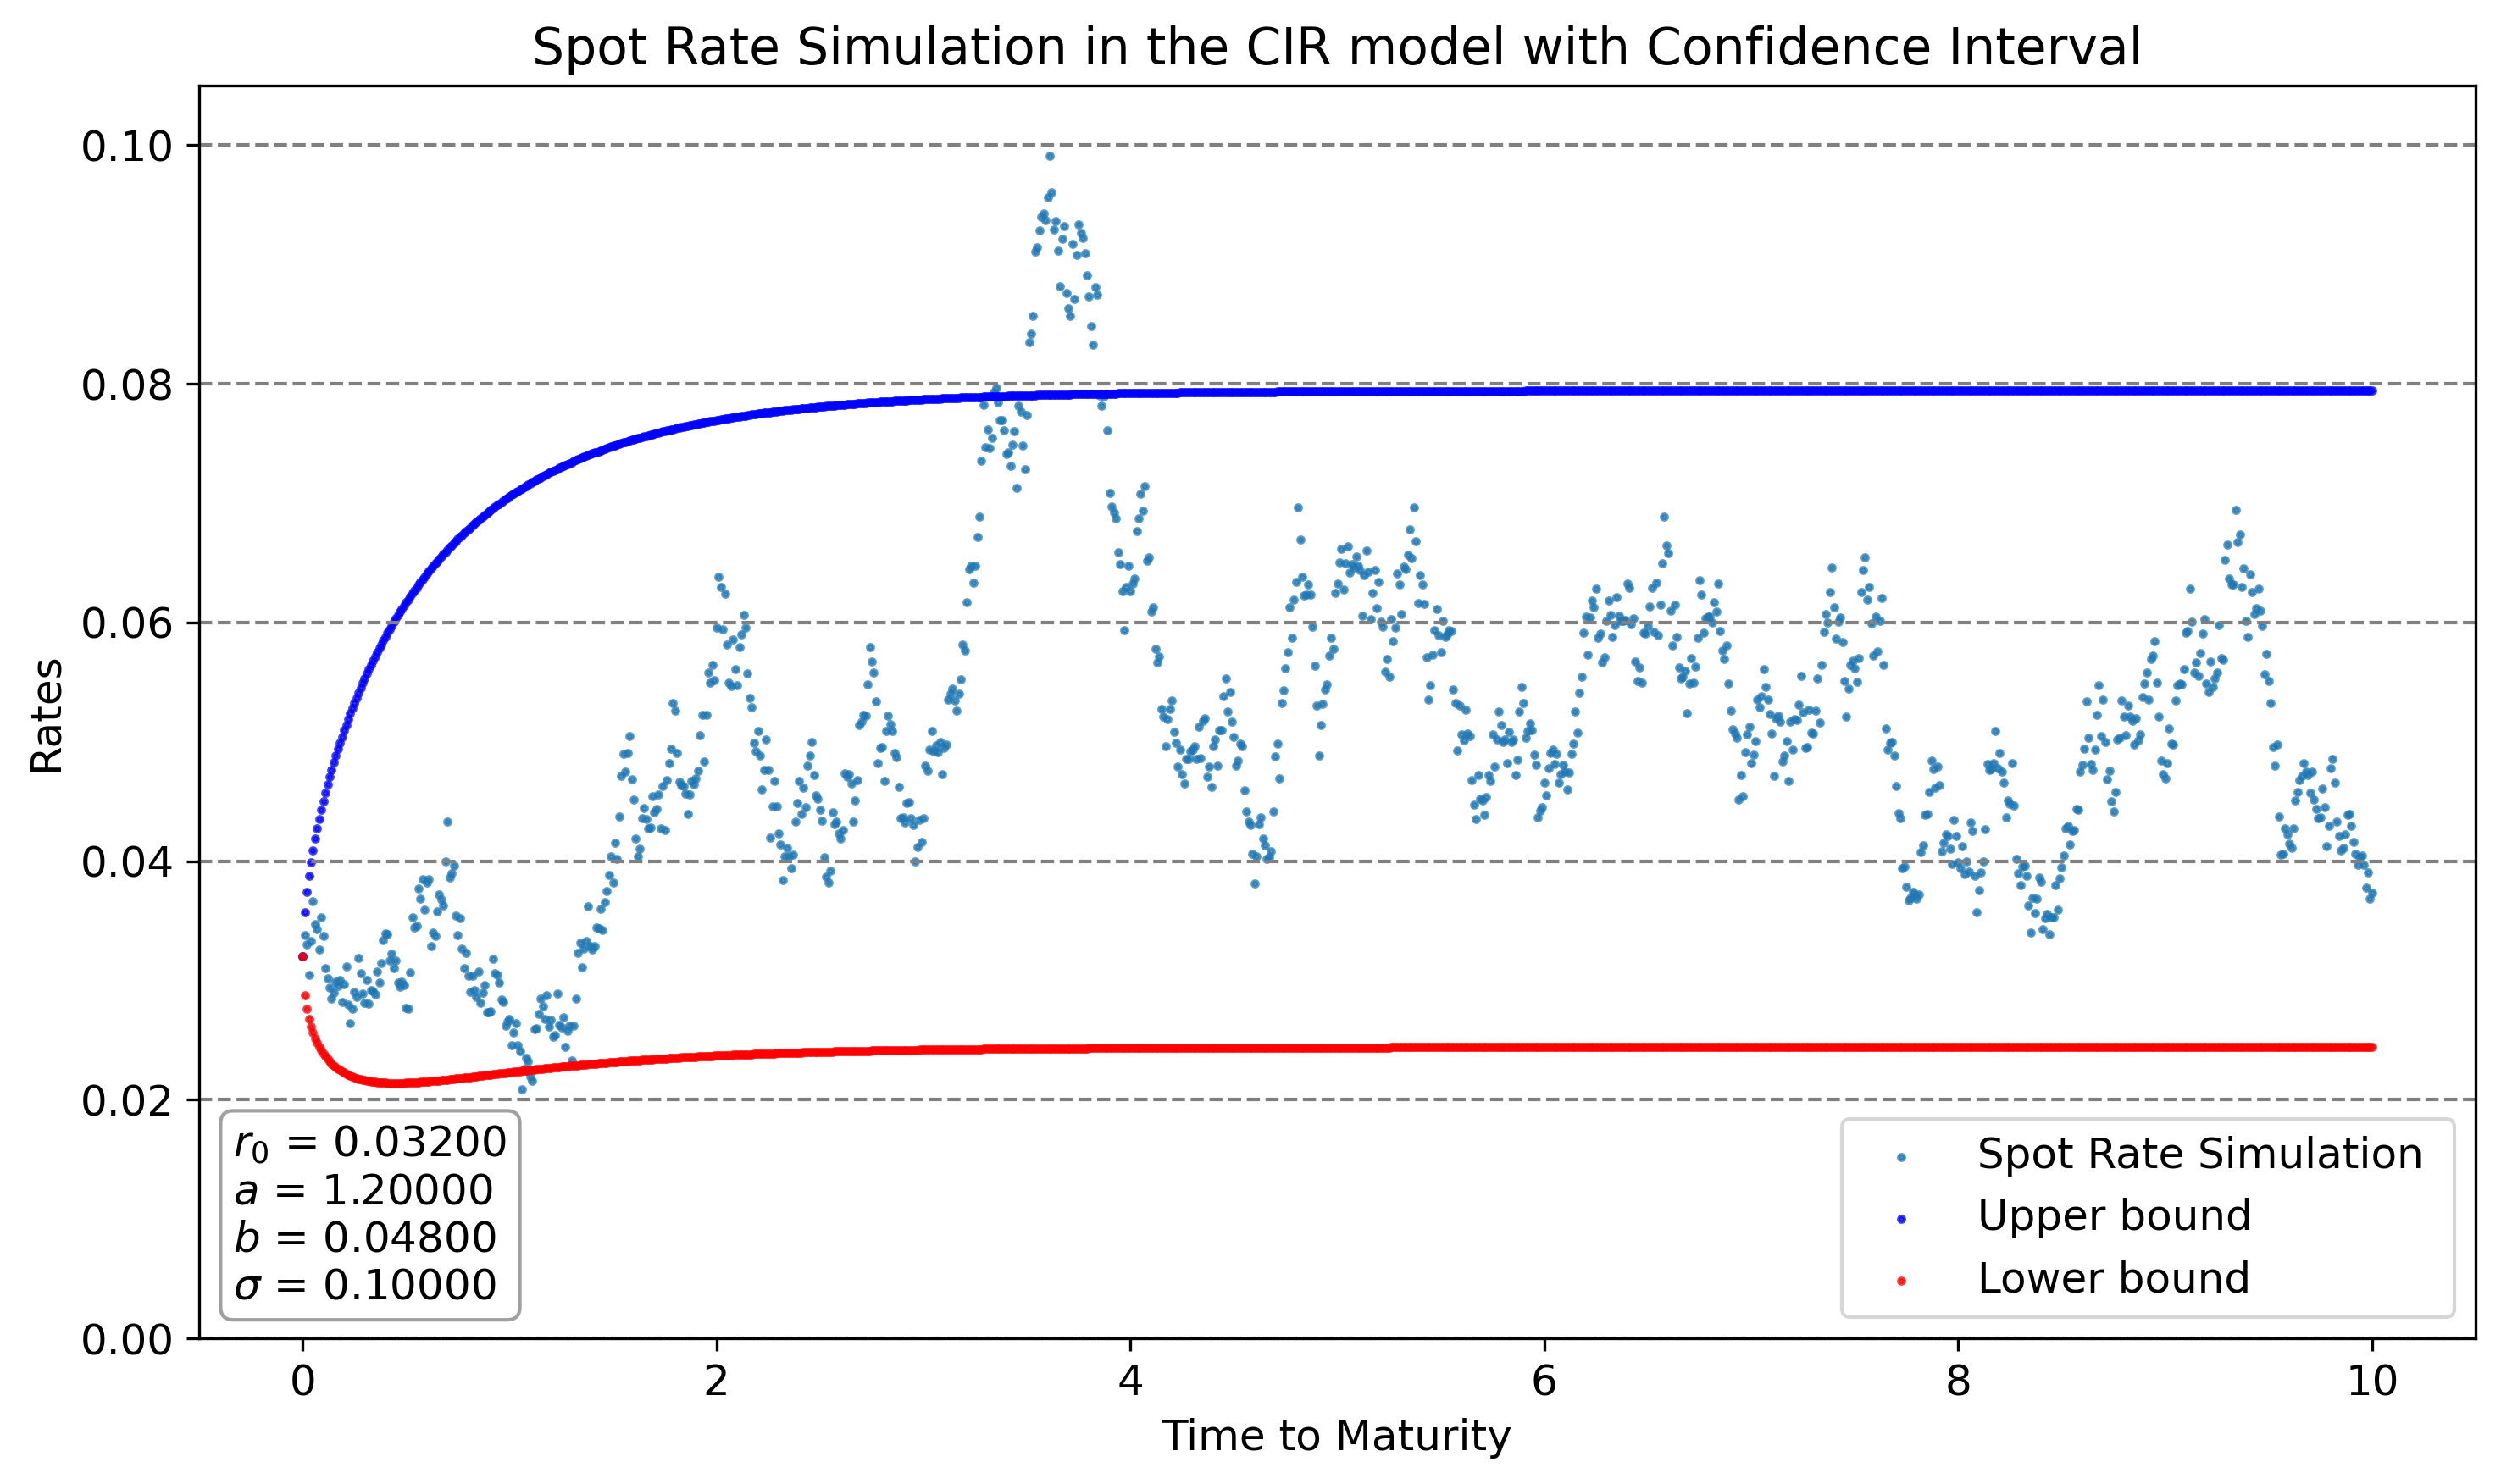

In [14]:
size_ci = 0.95
lb, ub = fid.ci_cir(r0,a,b,sigma,t_simul,size_ci)

# add dictionary to left_axis
left_axis.append({'label':'Upper bound','x':t_simul,'y':ub,'s':10, 'color':'blue'})
left_axis.append({'label':'Lower bound','x':t_simul,'y':lb,'s':10, 'color':'red'})

plot.rates(left_axis, title='Spot Rate Simulation in the CIR model with Confidence Interval', text=text)

#### (d) Construct a 95 percent two-sided confidence interval for the short rate under the stationary distribution and plot this confidence interval in the same plot. Based on the plot, can you say that the distribution of $r_3$ is roughly the same as that of the stationary distribution? How does this change if you change the parameters?

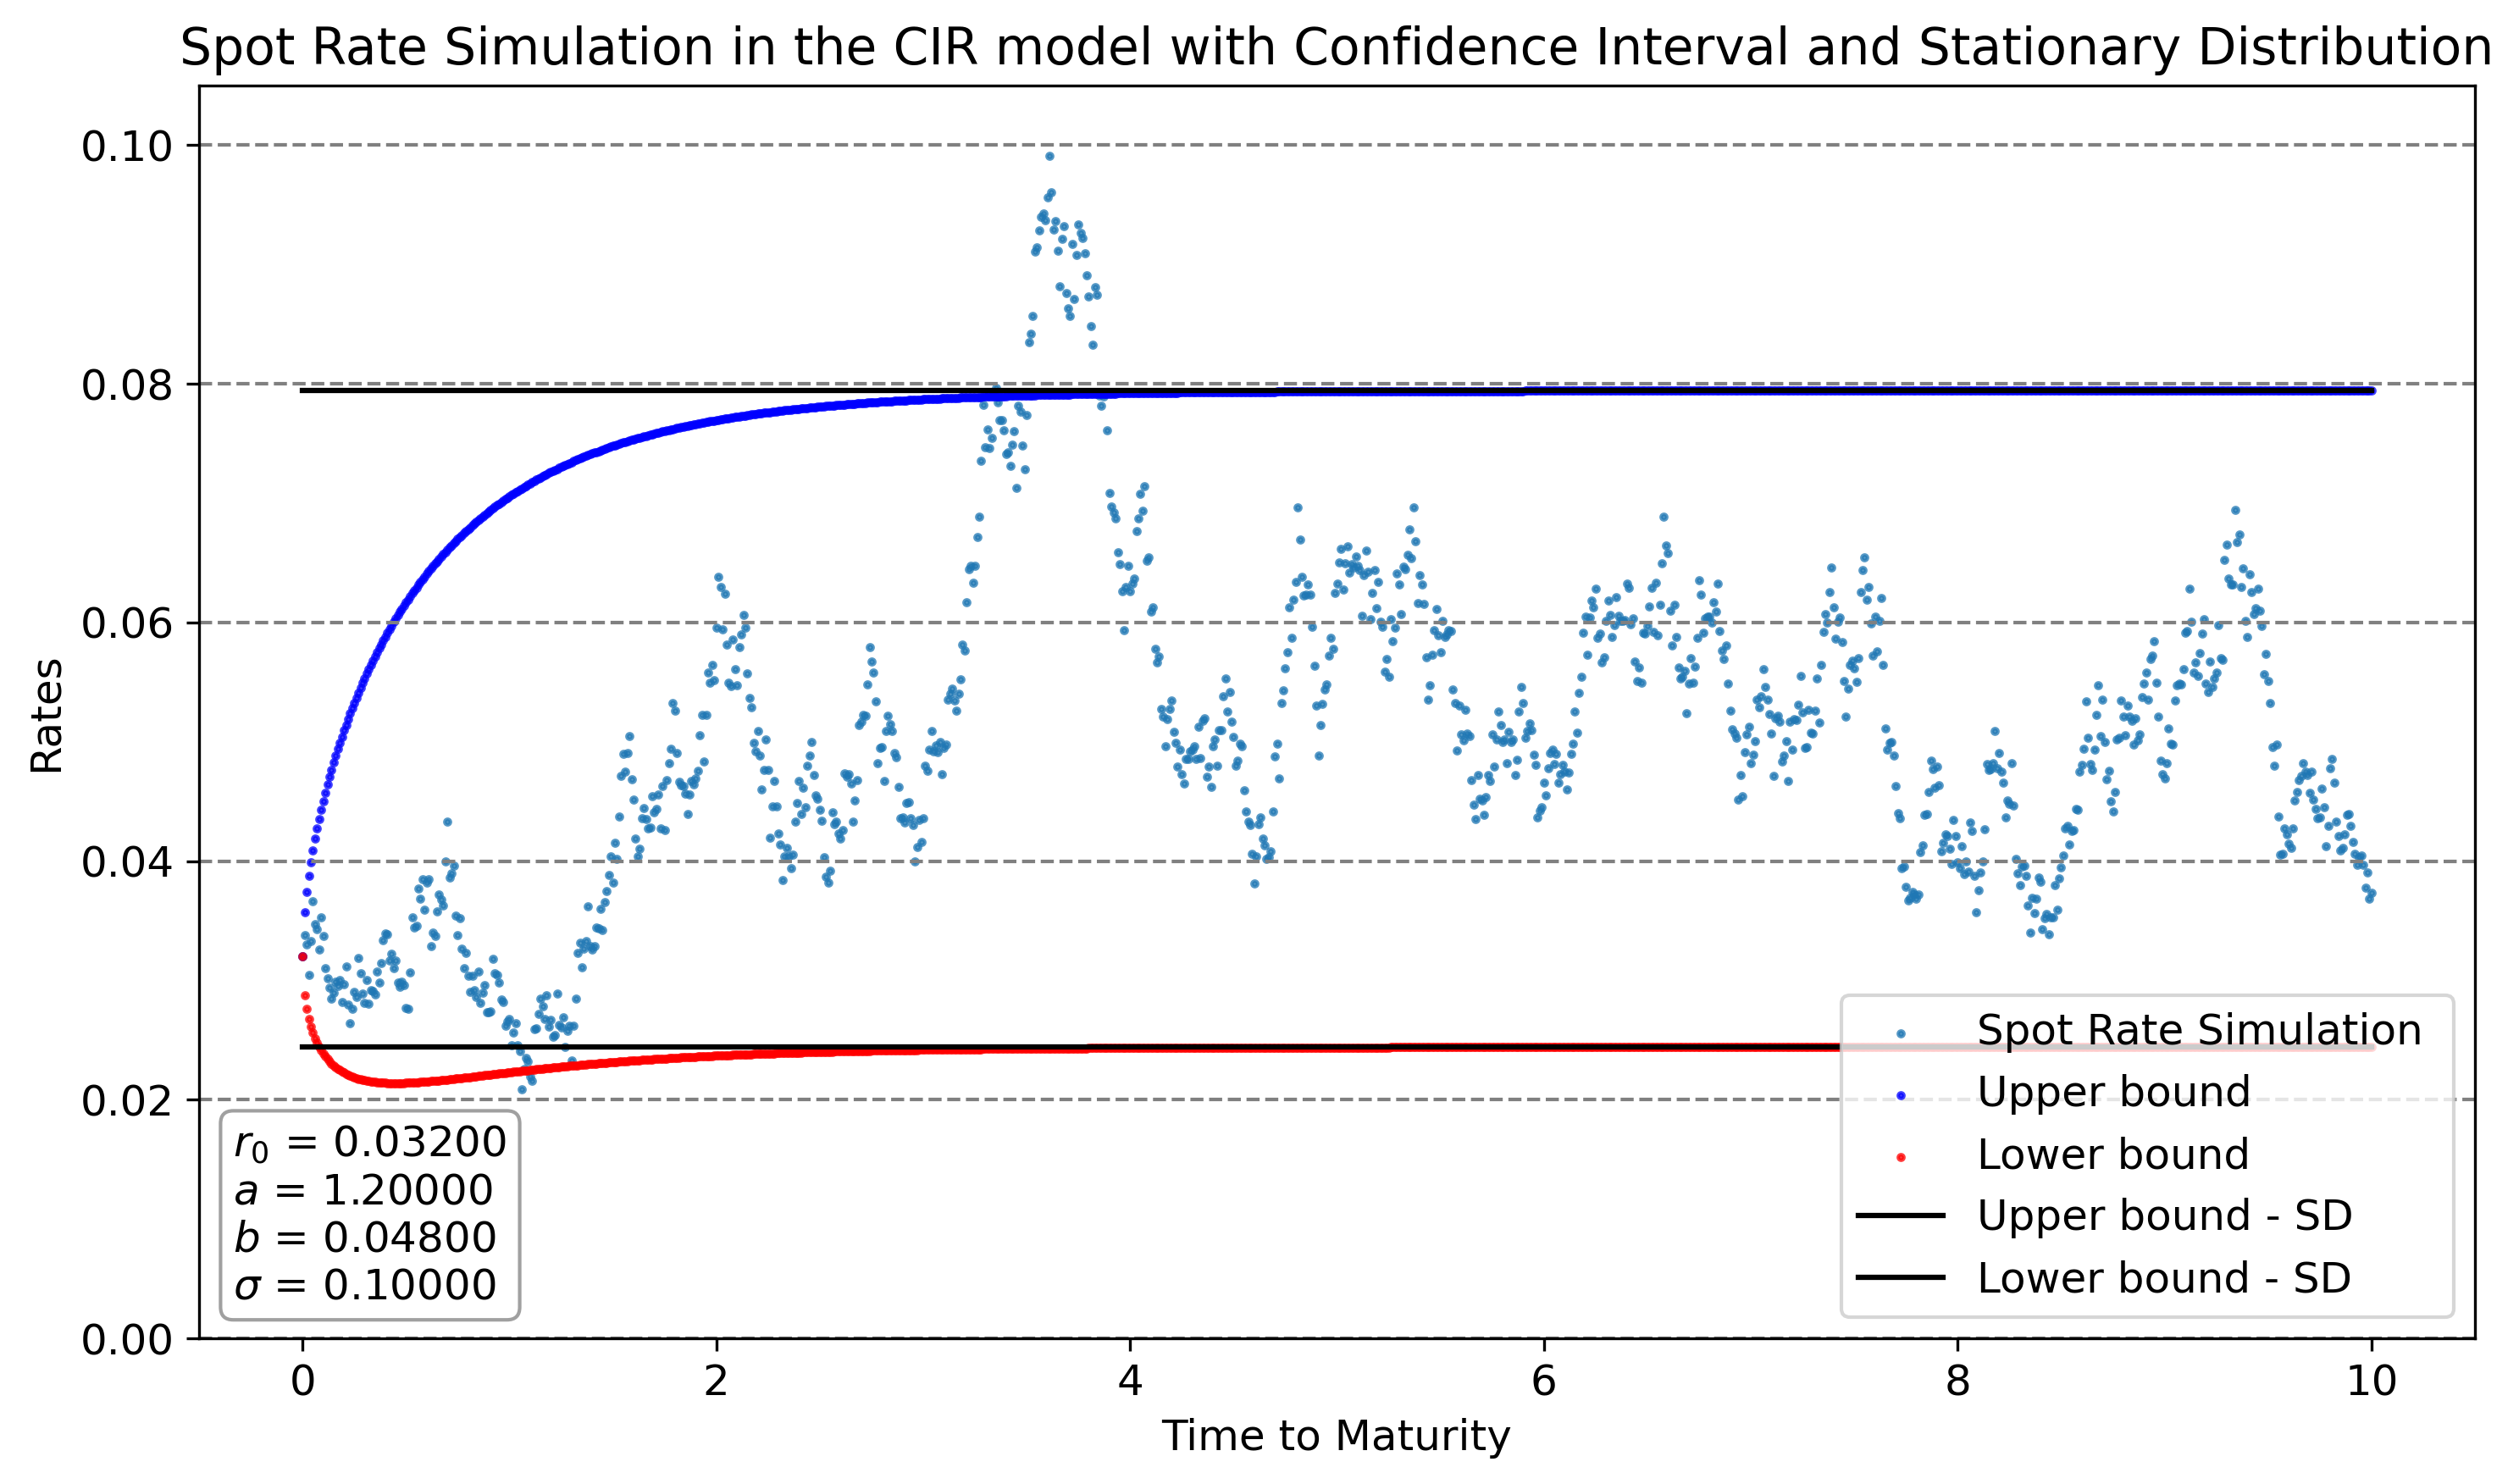

In [15]:
# stationary distribution
lb_sd, ub_sd = fid.ci_cir(r0,a,b,sigma,100,size_ci)

left_axis.append({'label':'Upper bound - SD','x':t_simul,'y':ub_sd*np.ones_like(t_simul),'s':10,'type':'line', 'color':'black'})
left_axis.append({'label':'Lower bound - SD','x':t_simul,'y':lb_sd*np.ones_like(t_simul),'s':10,'type':'line', 'color':'black'})

plot.rates(left_axis, title='Spot Rate Simulation in the CIR model with Confidence Interval and Stationary Distribution', text=text)

Above is the final plot of the short rate trajectory and the confidence intervals. We see that the distribution of $r_3$ is not the same as the just about the stationary distribution; hence after 3 years with the current parameters the distribution has reached the stationary distribution. As $a$ is the parameter governing mean reversion, increasing it will make the distribution converge faster to the stationary distribution.

## Problem 5 - Pricing an Interest Rate Cap in the CIR Model

We will now consider the pricing of an interest rate cap on future EURIBOR fixings that begins immediately and ends in $T = 5$ years. The cap will have a strike of $R=0.045$. We will price this derivative using simulation.

#### (a) Explain how an interest rate cap is related to caplets and also explain, how a caplet can be seen as a type of European option and on what underlying.
an interest rate cap is a sum of caplets across multiple periods. Each caplet acts as a European call option on the forward interest rate, with a strike of $R$. Its payoff depends only on the fixing of the forward rate for that period

#### Deduce an expression for the discounted payoff of a caplet at time $t = 0$ on the underlying reference rate $L(T_{i−1},T_i)$
The payoff of a caplet is that of a european call option on the forward rate $L(T_{i-1},T_i)$ with strike $R$ and maturity $T_i$ in the period is
$$
Payoff = \max\left(L(T_{i-1},T_i) - R, 0\right)
$$
Hence the discounted payoff at time $t = 0$ is
$$
\text{Discounted Payoff} = \delta_{T_i}\max\left(L(T_{i-1},T_i) - R, 0\right)
$$
Where $\delta_{T_i}$ is the discount factor at time $t = 0$ for a payment in $T_i$.

#### (c) Simulate at least $N = 1000$ trajectories for the short rate up to time $T = 5$ and in each simulation, at least $M = 1000$ steps should be taken. For each simulated path, compute the discounted payoffs to all caplets with a maturity less than $5$ years. Once you have simulated $N$ trajectories, you can compute the price of the caplets by averaging the discounted payoffs.

In [16]:
np.random.seed(2024)
M_simul_cap, N_simul = 1000, 1000
T_cap_begin, T_cap_end = 0.5, 5
strike = 0.045

idx_cap_begin, idx_cap_end = int(T_cap_begin/alpha), int(T_cap_end/alpha) # alpha is the timing between payments (0.5 years)
price_caplet = np.zeros([idx_cap_end+1])
chi = np.zeros([idx_cap_end-1, N_simul]) # 
r_simul_cap = np.zeros([M_simul_cap+1])

for i in range(0,N_simul):
    r_simul_cap = fid.simul_cir(r0, a, b, sigma, M_simul_cap, T_cap_end, method='exact')
    for idx in range(idx_cap_begin, idx_cap_end):
        idx_r_announcement = idx * int((alpha * M_simul_cap)/T_cap_end) 
        idx_payment = (idx+1) * int((alpha * M_simul_cap)/T_cap_end)
        p_cap = fid.zcb_price_cir(r_simul_cap[idx_r_announcement], a, b, sigma, alpha)
        delta = (idx + 1) * alpha / idx_payment
        chi[idx-1,i] = np.exp(-np.sum(r_simul_cap[0:idx_payment]) * delta) * (1 + alpha * strike) * np.max(1/(1+alpha*strike)-p_cap,0)

for idx in range(idx_cap_begin+1, idx_cap_end+1):
    price_caplet[idx] = np.mean(chi[idx-2,:])

print(f'Price caplet in basis points:\n{price_caplet*10000}')


Price caplet in basis points:
[  0.           0.         -16.76533602   1.03808931   7.64170261
  10.95037976  11.04265213  12.25497194  12.90413748  12.68545013
  13.23859122]


#### (d) Compute the price of the 5Y interest cap with a strike of $F = 0.045$ and discuss how the price of the cap depends on the strike $R$ and $\sigma$.

In [17]:
print(f'Price cap in basis points:\n{np.sum(price_caplet)*10000}')

Price cap in basis points:
64.99063855540452


#### (e) Also compute the price of a 2Y3Y payer swaption with a strike of $K = 0.045$ by using a similar approach of computing discounted payoffs for each trajectory and averaging over all simulations.

In [18]:
np.random.seed(2024)
idx_n_swaption, idx_N_swaption = 4, 10
M_simul_swaption, N_simul_swapltion, T_simul_swaption = 1000, 2000, T[idx_n_swaption]
chi, price_swaption_simul = np.zeros([N_simul_swapltion]), np.zeros([N_simul_swapltion])
T_swaption = np.array([T[i] - T[idx_n_swaption] for i in range(idx_n_swaption, idx_N_swaption+1)])
R_swaption = 0.045

for i in range(0,N_simul_swapltion):
    r_simul_swaption = fid.simul_cir(r0, a, b, sigma, M_simul_swaption, T_simul_swaption, method='exact')
    p_swaption = fid.zcb_price_cir(r_simul_swaption[-1], a, b, sigma, T_swaption)
    R_swap, S_swap, _ = swap_fct(0, idx_N_swaption-idx_n_swaption, alpha, p_swaption)
    chi[i] = np.max(R_swap - R_swaption,0) * S_swap
    price_swaption_simul[i] = np.exp(-(T_simul_swaption/M_simul_swaption)*np.sum(r_simul_swaption)) * chi[i]

price_swaption = np.mean(price_swaption_simul)

print(f'Price swaption in basis points:\n{price_swaption*10000}')


Price swaption in basis points:
78.82236948623185
